## USA and China Co2 Emissions Analysis
### by Ahmed Sayed

## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
co2=pd.read_csv('co2_emission.csv')

## Data Assessing

In [3]:
co2.shape

(20853, 4)

In [4]:
co2.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


- 1-There are a lot of missing values in the code column
- 2-Annual CO₂ emissions (tonnes ) Column name is too big and not easy to be called later

In [6]:
co2.Entity.nunique()

233

In [7]:
co2.Year.nunique()

267

In [8]:
co2.Year.min()

1751

In [9]:
co2.Year.max()

2017

In [10]:
co2['Annual CO₂ emissions (tonnes )'].max()

36153261645.0

In [11]:
co2['Annual CO₂ emissions (tonnes )'].min()

-625522256.7

- 3-Negative value of co2 emissions is inconsistent

## Data Cleaning

In [12]:
df_clean=co2.copy()

### 1-Define:
- Remove code column from the data as it has missing values and doesn't add any additional information to the analysis

### 1-Code

In [13]:
df_clean.drop(columns='Code',inplace=True)

### 1-Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Year                            20853 non-null  int64  
 2   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.9+ KB


-------------------------------------------------------------------------------------------------------------------

### 2-Define:
- Change Annual co2 emissions column to more clear name

### 2-Code

In [15]:
df_clean.rename(columns={'Annual CO₂ emissions (tonnes )':'Annual_co2_emissions'},inplace=True)

### 2-Test

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                20853 non-null  object 
 1   Year                  20853 non-null  int64  
 2   Annual_co2_emissions  20853 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.9+ KB


--------------------------------------------------

### 3-Define:
- Remove observations that have co2 emissions less than or equel zero

### 3-Code

In [17]:
condition=df_clean['Annual_co2_emissions']>0
df_clean=df_clean[condition]

### 3-Test

In [18]:
df_clean['Annual_co2_emissions'].min()

3664.0

------------

## Data Analysis and visualization

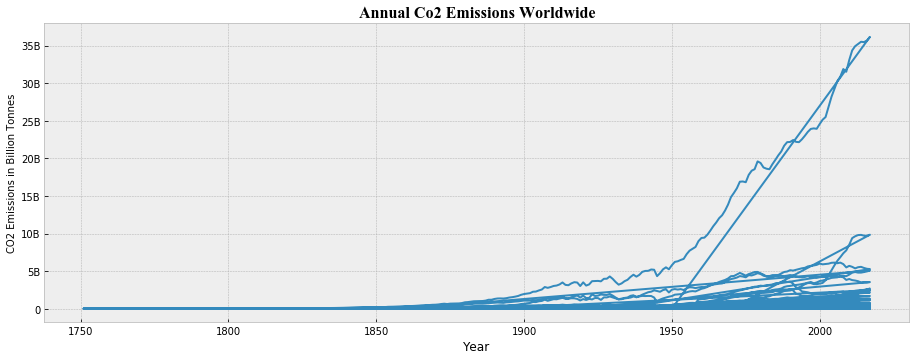

In [20]:
fig,ax=plt.subplots()
plt.style.use('bmh')
fig.set_size_inches(15.5, 5.5)
ax.plot(df_clean['Year'],df_clean['Annual_co2_emissions'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions in Billion Tonnes',fontsize=10)
plt.yticks([0.0*1e10,0.5*1e10,1.0*1e10,1.5*1e10,2.0*1e10,2.5*1e10,3.0*1e10,3.5*1e10],['0','5B','10B','15B','20B','25B','30B','35B'])
plt.title('Annual Co2 Emissions Worldwide',fontname='Times new roman',fontsize=16)
plt.show()

--------------------

### Let's make a comparison between co2 emissions of china and USA

In [21]:
condition_2=['United States','China']

us_ch_2000=df_clean[(df_clean['Entity'].isin(condition_2) ) & (df_clean['Year']>1900 )]

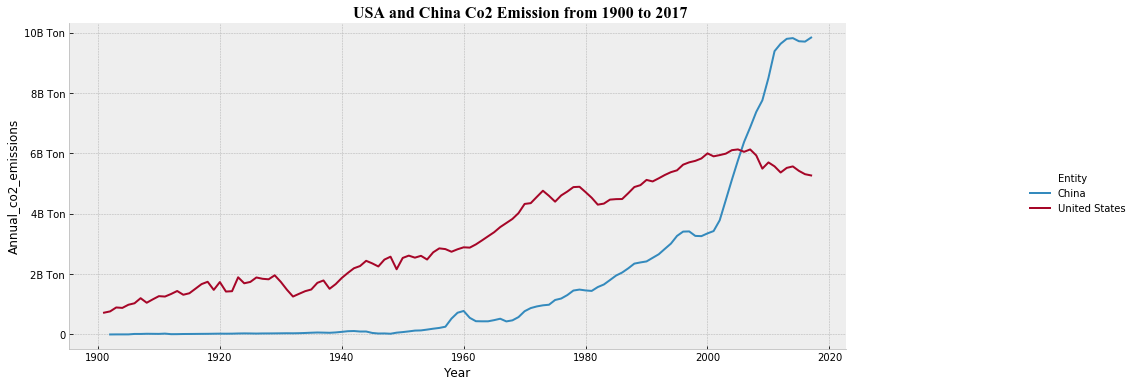

In [23]:
g=sns.relplot(x='Year',y='Annual_co2_emissions',data=us_ch_2000,kind='line',hue='Entity',markers=True)
g.fig.suptitle('USA and China Co2 Emission from 1900 to 2017',fontsize=16,fontname='Times new roman')
sns.set_context('poster')
g.fig.set_size_inches(17, 5.5)
plt.yticks([0.0*1e10,0.2*1e10,0.4*1e10,0.6*1e10,0.8*1e10,1.0*1e10],['0','2B Ton','4B Ton','6B Ton','8B Ton','10B Ton'])
plt.show()

In [24]:
china_emissions=df_clean[df_clean['Entity']=='China']
usa_emissions=df_clean[df_clean['Entity']=='United States']

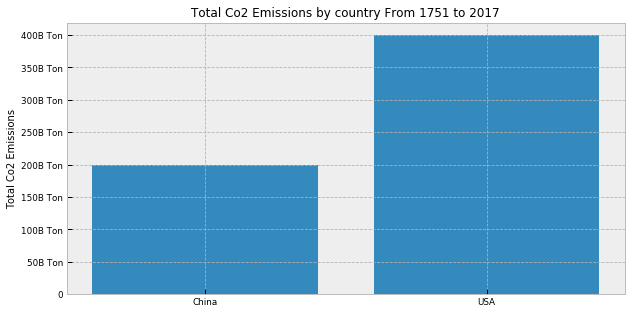

In [28]:
ch_co2=china_emissions['Annual_co2_emissions'].sum()
us_co2=usa_emissions['Annual_co2_emissions'].sum()
emissions=[ch_co2,us_co2]
countries=['China','USA']
fig,ax=plt.subplots()
fig.set_size_inches(10, 5)
sns.set_context('paper')
ax.bar(countries,emissions)
plt.title('Total Co2 Emissions by country From 1751 to 2017',fontsize=12)
plt.yticks([0.0*1e11,0.5*1e11,1.0*1e11,1.5*1e11,2.0*1e11,2.5*1e11,3.0*1e11,3.5*1e11,4.0*1e11],
           ['0','50B Ton','100B Ton','150B Ton','200B Ton','250B Ton','300B Ton','350B Ton','400B Ton'])
plt.ylabel('Total Co2 Emissions',fontsize=10)
plt.show()

In [29]:
condition_2=['United States','China']
us_ch_1990=df_clean[(df_clean['Entity'].isin(condition_2) ) & (df_clean['Year']>1990 )]

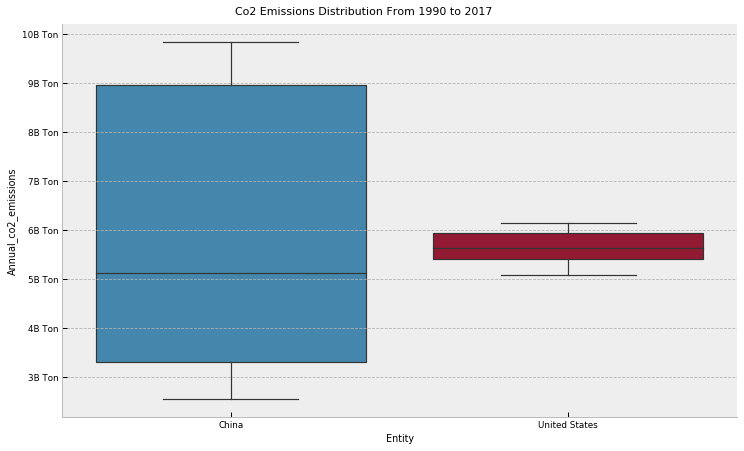

In [30]:
b=sns.catplot(x='Entity',y='Annual_co2_emissions',data=us_ch_1990,kind='box')
b.fig.suptitle('Co2 Emissions Distribution From 1990 to 2017',fontsize=11)
plt.yticks([0.3*1e10,0.4*1e10,0.5*1e10,0.6*1e10,0.7*1e10,0.8*1e10,0.9*1e10,1.0*1e10],
          ['3B Ton','4B Ton','5B Ton','6B Ton','7B Ton','8B Ton','9B Ton','10B Ton'])
b.fig.set_size_inches(11, 6.5)
plt.show()

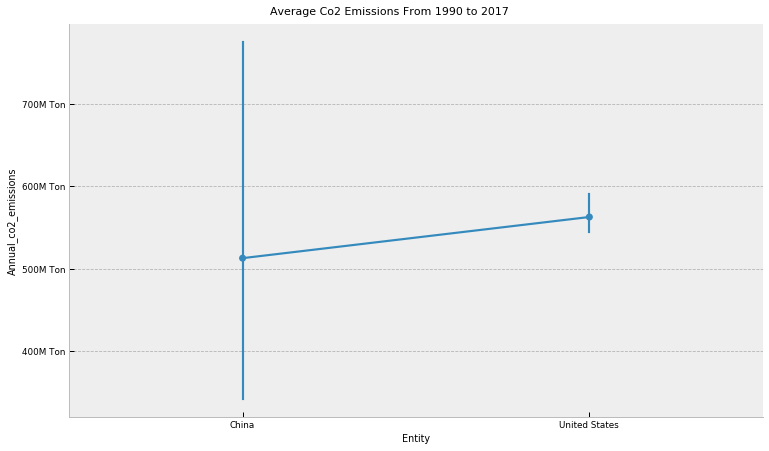

In [36]:
from numpy import median
l=sns.catplot(x='Entity',y='Annual_co2_emissions',data=us_ch_1990,kind='point',estimator=median)
l.fig.suptitle('Average Co2 Emissions From 1990 to 2017',fontsize=11)
plt.yticks([4*1e9,5*1e9,6*1e9,7*1e9],
          ['400M Ton','500M Ton','600M Ton','700M Ton'])
l.fig.set_size_inches(11, 6.5)
plt.show()

In [37]:
us_ch_1970_1990=df_clean[(df_clean['Entity'].isin(condition_2) ) & (df_clean['Year']<=1990 ) &(df_clean['Year']>=1970)]

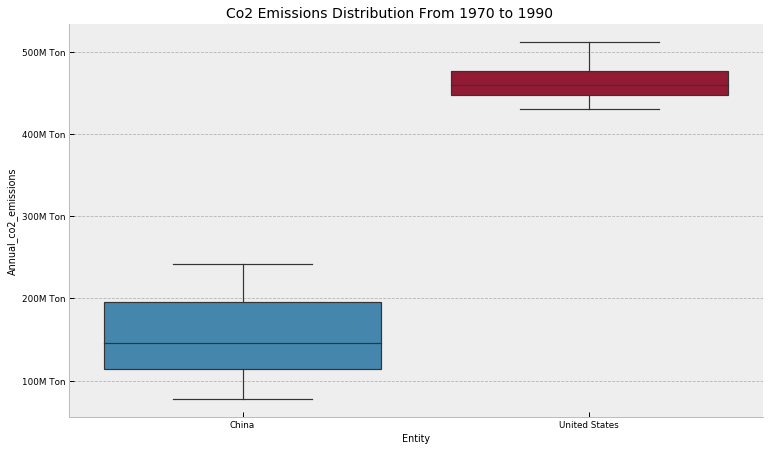

In [38]:
#b=sns.catplot(x='Entity',y='Annual_co2_emissions',data=us_ch_1990,kind='box')
c=sns.catplot( x="Entity",y='Annual_co2_emissions',data=us_ch_1970_1990,kind='box')
c.fig.suptitle('Co2 Emissions Distribution From 1970 to 1990',fontsize=14)
plt.yticks([1*1e9,2*1e9,3*1e9,4*1e9,5*1e9],
          ['100M Ton','200M Ton','300M Ton','400M Ton','500M Ton'])
c.fig.set_size_inches(11, 6.5)
plt.show()

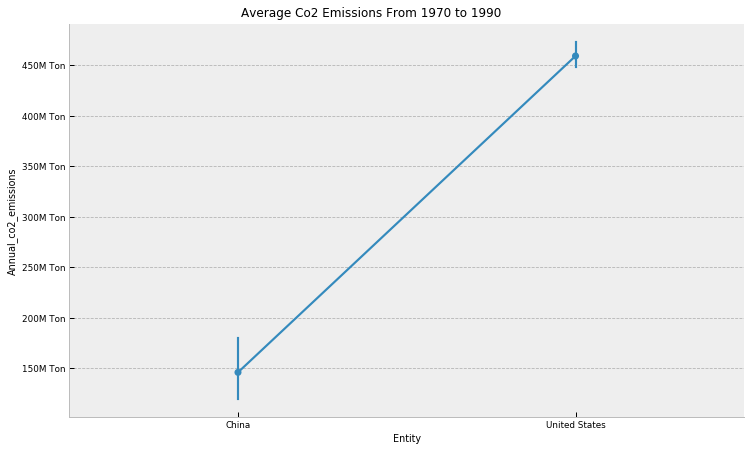

In [43]:
k=sns.catplot(x='Entity',y='Annual_co2_emissions',data=us_ch_1970_1990,kind='point',estimator=median)
k.fig.suptitle('Average Co2 Emissions From 1970 to 1990',fontsize=12)
plt.yticks([1.5*1e9,2.0*1e9,2.5*1e9,3.0*1e9,3.5*1e9,4.0*1e9,4.5*1e9],
           ['150M Ton','200M Ton','250M Ton','300M Ton','350M Ton','400M Ton','450M Ton'])
k.fig.set_size_inches(11, 6.5)
plt.show()

--------------------

## Top contributers to Co2 Emissions since 1750

Text(0.5, 1.0, 'Total Co2 Emission for top contributors of co2 from 1751 to 2017')

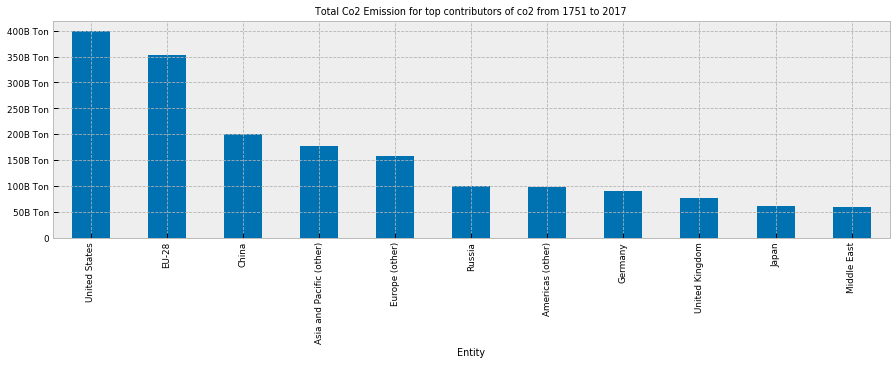

In [46]:
fig,ax=plt.subplots()
plt.style.use('seaborn-colorblind')
fig.set_size_inches(15, 4)

df_clean.groupby('Entity')['Annual_co2_emissions'].sum().sort_values(ascending=False)[1:12].plot(kind='bar')
plt.yticks([0.0*1e11,0.5*1e11,1.0*1e11,1.5*1e11,2.0*1e11,2.5*1e11,3.0*1e11,3.5*1e11,4.0*1e11],
           ['0','50B Ton','100B Ton','150B Ton','200B Ton','250B Ton','300B Ton','350B Ton','400B Ton'])
plt.title('Total Co2 Emission for top contributors of co2 from 1751 to 2017')


--------

##                                  Who polluted the planet the most with co2 emissions in the last in the 21 Century ?

In [57]:
top_contributers1=['United States','EU-28','China','Asia and Pacific (other)','Europe (other)','Russia']
df_top1=df_clean[df_clean['Entity'].isin(top_contributers1)]

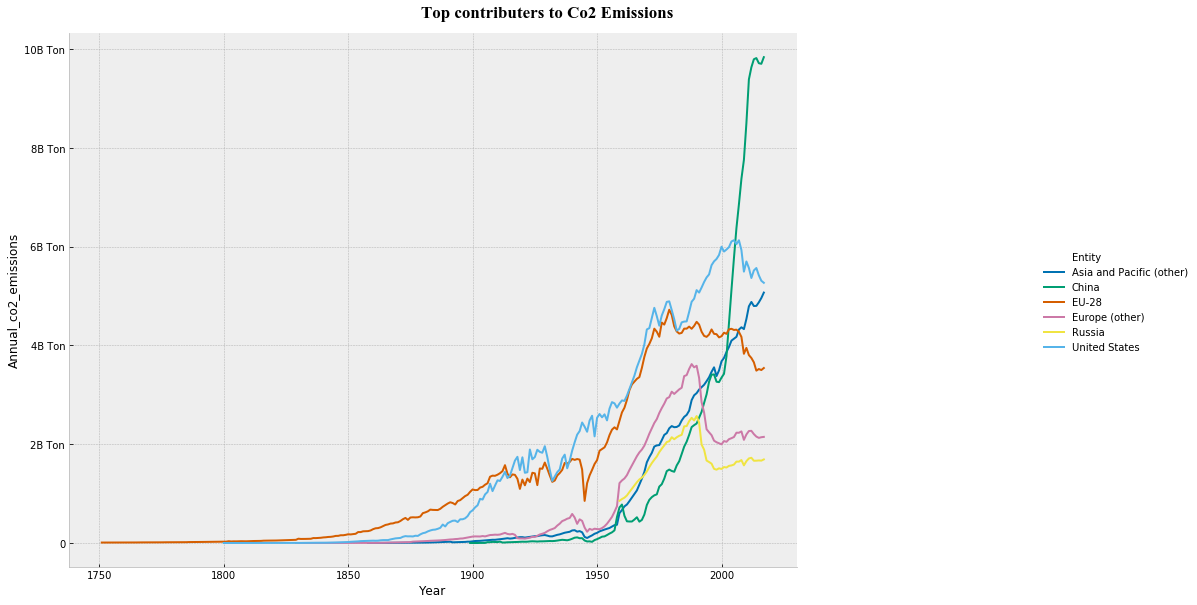

In [62]:
w=sns.relplot(x='Year',y='Annual_co2_emissions',data=df_top1,kind='line',hue='Entity',markers=True)
w.fig.suptitle('Top contributers to Co2 Emissions',fontsize=17,fontname='Times new roman')
w.fig.set_size_inches(18, 9)
plt.yticks([0.0*1e10,0.2*1e10,0.4*1e10,0.6*1e10,0.8*1e10,1.0*1e10],['0','2B Ton','4B Ton','6B Ton','8B Ton','10B Ton'])
plt.show()

----